In [1]:
# Fetch libraries
import os
if os.getcwd() != "/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM":
    os.chdir("../../")
from PotentialFlowSolver import *
if os.getcwd() == "/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM":
    os.chdir("./Potential_flow_solver/PotentialFlowSolverCLS")

Libraries fetched!...



In [2]:
# Define a model
kwargs = {"ylim":[-10,10], "V_inf": 10, "g_div": 70, "write":True,
        "n_airfoil": 1000,
        "n_fs": 40,
        "n_bed": 40,
        "n_inlet": 20,
        "n_outlet": 20,
        "dot_tol": 1e-4, "b":0.12}
model = PotentialFlowSolver("0012", alpha = 10, P=3, kwargs = kwargs)

In [3]:
# Solve the model
#model.solve()

Text(0, 0.5, 'Dot product value')

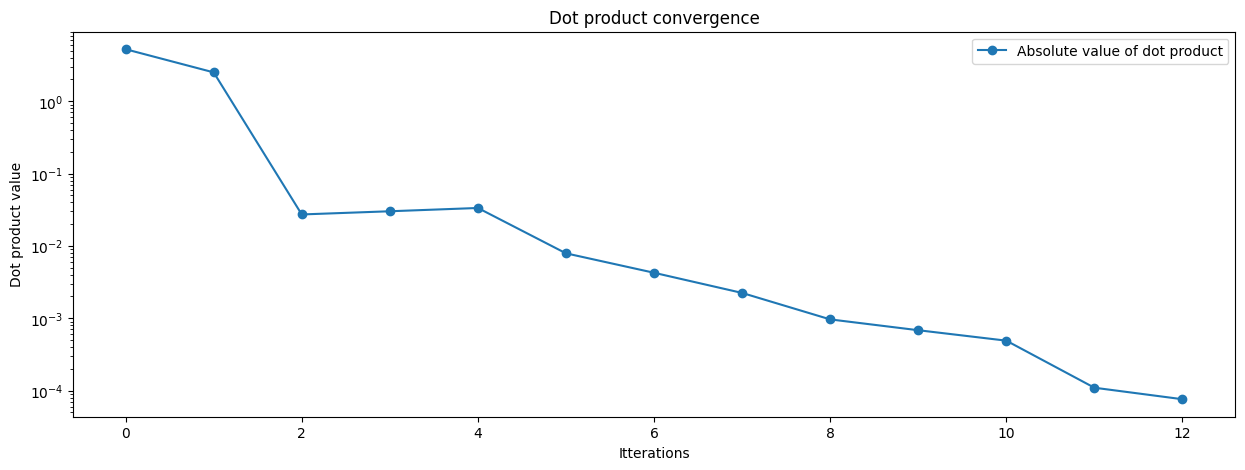

In [ ]:
# Dot product convergence
fig, ax = plt.subplots(figsize=(15, 5))
dot_products = np.array([5.239313678438677, 2.506657304711432, 0.0272113189471667, 0.030118432727109946, 0.0334379477054915, 0.007894843831099731, 0.00425077567260686, 0.0022370479474240045, -0.0009634718042658665, -0.0006825536485841792, -0.0004895235232482021, -0.00010943299507348062, -7.58684418787356e-05])
dot_products = np.abs(dot_products)

ax.set_title('Dot product convergence')
ax.semilogy(dot_products, label='Absolute value of dot product', marker='o')
ax.legend()
ax.set_xlabel('Itterations')
ax.set_ylabel('Dot product value')